<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [3]:
yelp.shape

(10000, 9)

In [4]:
yelp.isnull().sum()

business_id    0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
useful         0
user_id        0
dtype: int64

In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
business_id    10000 non-null object
cool           10000 non-null int64
date           10000 non-null datetime64[ns]
funny          10000 non-null int64
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
useful         10000 non-null int64
user_id        10000 non-null object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 703.2+ KB


In [6]:
yelp.describe()

,cool,funny,stars,useful
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.564800,0.468900,3.735800,1.363600
std,2.040298,1.801043,1.461647,3.129085
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000
50%,0.000000,0.000000,4.000000,0.000000
75%,0.000000,0.000000,5.000000,2.000000
max,61.000000,79.000000,5.000000,62.000000


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [7]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [9]:
nlp.Defaults.stop_words |= {'\n', '\n\n', ' ', '  ', '   ', '    ', '     ', 'yelp'}

In [10]:
def tokenize(doc):
    lemmas = []
    
    doc = nlp(doc)
    
    for token in doc: 
        if ((token.lemma_ not in nlp.Defaults.stop_words)
            and (token.is_punct == False)
            and (token.pos_ != 'PRON')
            and (token.lemma_ != '-PRON-')):
            lemmas.append(token.lemma_)
    
    return lemmas

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
# collect list of review texts

data = [text for text in yelp['text']]

In [14]:
%%time
# Instantiate vectorizer object
tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=0.01, max_df=0.98, ngram_range=(1,2))

# Create a vocabulary and get word counts per document
sparse = tfidf.fit_transform(data)

CPU times: user 4min 46s, sys: 1.5 s, total: 4min 48s
Wall time: 4min 5s


In [15]:
# Print word counts
print(f'Vector length: {sparse.shape[1]}')
type(sparse), sparse.shape

Vector length: 778


(scipy.sparse.csr.csr_matrix, (10000, 778))

In [16]:
# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())
dtm.head()

,,$,$ 10,+,1,10,10 minute,100,12,15,...,wow,wrap,write,wrong,year,year ago,yes,young,yum,yummy
0,0.0,0.108004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.162524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.093532,0.0,0.0,0.143546,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.099916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150015,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [17]:
# Find similar reviews
# Instantiate
from sklearn.neighbors import NearestNeighbors

# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [32]:
# Create smaple review and find similar yelp reviews
sample_review = [
    """
    This place was awesome. 
    They had strobe lights and dancing frogs. 
    The staff was great, and the drinks pack quite a punch.
    """]

t_review = tfidf.transform(sample_review)
similar = nn.kneighbors(t_review.todense())

In [33]:
similar

(array([[1.        , 1.        , 1.        , 1.08738418, 1.10766848,
         1.11486749, 1.15323976, 1.15662031, 1.15795634, 1.15871544]]),
 array([[8413, 6311, 6204, 8467, 6997, 7404, 1299,  335, 7594, 2116]]))

In [34]:
for index in similar[1][0]:
    print(yelp['text'].iloc[index], end='\n\n')

Devin from Aptive Environmental went above and beyond! He got into every nook & cranny spraying for those pesky scorpions!!

天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來

旅行でラスベガスに来ましたがネイルがはげてるのが気になり、探したお店でした。
質問にも丁寧に答えてくれましたし、日本人の方も日本語が話せる方も居て、とても綺麗で居心地のいいお店でした。 
ネイルはちはるさんと言う綺麗な方が丁寧にしてくれとても気に入りました。
予定になかったまつ毛エクステもお願いし、日本ではまだあまりないブラウンカラーのエクステをしてもらい、とても気に入りました。
また是非マッサージなどで伺いたいと思います。

My first time to this location and it was packed!!! Never seen a Starbucks line this packed. That tell you right there it's good. They got people in and out quickly and drinks were made perfect. I get a strawberry OG gummy bear blue rebel blended and it is amazing. Colorful too lol but love that it's an energy drink. My wife always gets a blended coffee and is pleased every time. Customer service is great and staff is friendly. I will definitely be back for more.

A must visit if you like a place just outside the buzz and lights of Freemont St. Marked by a n

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [24]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
# define pipeline components
vect = TfidfVectorizer(stop_words='english')
clf = SGDClassifier(early_stopping=True, random_state=42)

In [26]:
# Pipe
pipe = Pipeline([('vect', vect), ('clf', clf)])

In [27]:
pipe.fit(yelp['text'], yelp['stars'])

/home/matt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [36]:
# make predicition
predicted_stars = pipe.predict(sample_review)
print(f'Number of stars predicted for sample review: {predicted_stars[0]}')

Number of stars predicted for sample review: 5


In [38]:
%%time
# Tune the entire pipeline with a GridSearch

parameters = {
    'vect__max_df': (0.9, 1.0),
    'vect__min_df': (.01, .03),
    'clf__max_iter':(100, 1000)
}

grid_search = GridSearchCV(pipe, parameters, cv=4, n_jobs=-1, verbose=3)
grid_search.fit(yelp['text'], yelp['stars'])

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  2.5min finished
/home/matt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


CPU times: user 3.1 s, sys: 239 ms, total: 3.34 s
Wall time: 2min 34s


In [39]:
# make a better predicition
better_predicted_stars = grid_search.predict(sample_review)
print(f'Number of stars predicted for sample review: {better_predicted_stars[0]}')

Number of stars predicted for sample review: 5


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [40]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

Learn the vocubalary of the yelp data:

In [53]:
id2word = Dictionary([tokenize(text) for text in yelp['text']])

In [54]:
len(id2word)

28700

In [55]:
# remove extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)
len(id2word)

6502

Create a bag of words representation of the entire corpus

In [57]:
%%time
corpus = [id2word.doc2bow(tokenize(text)) for text in yelp['text']]

CPU times: user 4min 45s, sys: 1.05 s, total: 4min 46s
Wall time: 4min 4s


In [58]:
corpus[400][:10]

[(0, 1),
 (19, 1),
 (20, 1),
 (22, 1),
 (35, 2),
 (37, 1),
 (40, 3),
 (75, 1),
 (95, 1),
 (150, 2)]

Your LDA model should be ready for estimation: 

In [61]:
%%time
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=2,
                   num_topics = 10 # You can change this parameter
                  )

CPU times: user 1.75 s, sys: 160 ms, total: 1.91 s
Wall time: 2 s


Create 1-2 visualizations of the results

In [68]:
import re

words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t) for t in words]
for id, t in enumerate(topics):
    print(f'------ Topic {id + 1} ------')
    print(t, end="\n\n")

------ Topic 1 ------
good great food time place like service order come $

------ Topic 2 ------
good place time like food come great order service $

------ Topic 3 ------
time great good like place food try order service come

------ Topic 4 ------
good place come food order great time service like look

------ Topic 5 ------
good place like food time great service order come love

------ Topic 6 ------
good place come food great time service like love order

------ Topic 7 ------
good food place great time service come like try order

------ Topic 8 ------
good food place like order great come time service price

------ Topic 9 ------
good place food great service come time order like try

------ Topic 10 ------
place food good time come order great service like eat



In [76]:
import squarify
import matplotlib.pyplot as plt

In [98]:
weights = [re.findall(r'([\d.]{5})',t[1]) for t in lda.print_topics()]
weight_00 = [float(f) for f in weights[0]]
weight_01 = [float(f) for f in weights[1]]

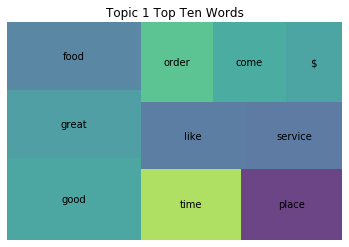

In [96]:
squarify.plot(sizes=weight_00, label=words[0], alpha=.8 )
plt.axis('off')
plt.title("Topic 1 Top Ten Words")
plt.show()

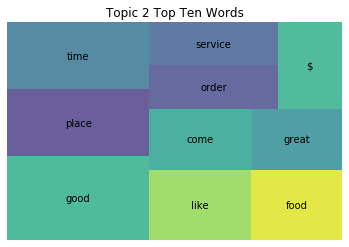

In [99]:
squarify.plot(sizes=weight_01, label=words[1], alpha=.8 )
plt.axis('off')
plt.title("Topic 2 Top Ten Words")
plt.show()

### Analysis of topic model

Most reviews in this corpus are about places to eat, with price, service, and time among the most mentioned features. Most of the reviews appear to be on the whole positive in nature.

The topics were very similar. Several stops can be taken to create greater differentiation among the topics, increasing the ability to group reviews. These include filtering out more stop words, running a more exhaustive grid search for hyperparameter tuning, and utilizing more compute time with lda. Also, a coherence benchmark can be run to help select the optimal number of topics.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)